In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/career-con-2019/sample_submission.csv
/kaggle/input/career-con-2019/X_test.csv
/kaggle/input/career-con-2019/y_train.csv
/kaggle/input/career-con-2019/X_train.csv


In [2]:
# !pip install cython
# !pip install TA-Lib

In [3]:
# !curl https://drive.google.com/uc?authuser=0&id=1pdEeL05T6-KyEao1kTCwCD4VXIAp3XsG&export=download
# ! echo "--LS HERE--"
# !ls
# !tar -xvf ta-lib-0.4.0-src.tar.gz
# !cd ta-lib/
# !./configure --prefix=/usr
# !make
# !make install

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.


In [5]:
# local
# xtrainPath = './X_train.csv'
# xtestPath = './X_test.csv'
# samplePath = './sample_submission.csv'
# ytrainPath = './y_train.csv'
# kaggle
xtrainPath = '/kaggle/input/career-con-2019/X_train.csv'
xtestPath = '/kaggle/input/career-con-2019/X_test.csv'
samplePath = '/kaggle/input/career-con-2019/sample_submission.csv'
ytrainPath = '/kaggle/input/career-con-2019/y_train.csv'

In [6]:
X_train = pd.read_csv(xtrainPath)
X_test = pd.read_csv(xtestPath)
#X_test = X_test.set_index('series_id')
#X_test['series_id'] = X_test.index
sample_submission = pd.read_csv(samplePath)
y_train = pd.read_csv(ytrainPath)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 487680 non-null  object 
 1   series_id              487680 non-null  int64  
 2   measurement_number     487680 non-null  int64  
 3   orientation_X          487680 non-null  float64
 4   orientation_Y          487680 non-null  float64
 5   orientation_Z          487680 non-null  float64
 6   orientation_W          487680 non-null  float64
 7   angular_velocity_X     487680 non-null  float64
 8   angular_velocity_Y     487680 non-null  float64
 9   angular_velocity_Z     487680 non-null  float64
 10  linear_acceleration_X  487680 non-null  float64
 11  linear_acceleration_Y  487680 non-null  float64
 12  linear_acceleration_Z  487680 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 48.4+ MB


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488448 entries, 0 to 488447
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 488448 non-null  object 
 1   series_id              488448 non-null  int64  
 2   measurement_number     488448 non-null  int64  
 3   orientation_X          488448 non-null  float64
 4   orientation_Y          488448 non-null  float64
 5   orientation_Z          488448 non-null  float64
 6   orientation_W          488448 non-null  float64
 7   angular_velocity_X     488448 non-null  float64
 8   angular_velocity_Y     488448 non-null  float64
 9   angular_velocity_Z     488448 non-null  float64
 10  linear_acceleration_X  488448 non-null  float64
 11  linear_acceleration_Y  488448 non-null  float64
 12  linear_acceleration_Z  488448 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 48.4+ MB


In [9]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   series_id  3810 non-null   int64 
 1   group_id   3810 non-null   int64 
 2   surface    3810 non-null   object
dtypes: int64(2), object(1)
memory usage: 89.4+ KB


In [10]:
X_train.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792262,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


In [11]:
X_test.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000
mean,1907.500000,63.500000,0.031996,0.120651,0.018735,0.004024,0.000401,0.013669,-0.036101,0.125433,2.906588,-9.359811
std,1101.585403,36.949327,0.671977,0.714522,0.108481,0.100957,0.114485,0.089440,0.233791,1.832639,2.094727,2.802670
min,0.000000,0.000000,-0.989720,-0.989810,-0.154680,-0.156270,-2.403300,-1.193000,-1.458200,-35.040000,-107.480000,-83.173000
25%,953.750000,31.750000,-0.648130,-0.744503,-0.112660,-0.098434,-0.037396,-0.029865,-0.089843,-0.486233,2.052100,-10.125000
50%,1907.500000,63.500000,0.132910,0.397860,0.057271,0.022654,0.001107,0.007276,-0.008911,0.112490,2.900300,-9.361700
75%,2861.250000,95.250000,0.575270,0.803600,0.124770,0.083706,0.037827,0.051112,0.057876,0.727250,3.758000,-8.582075
max,3815.000000,127.000000,0.989320,0.988940,0.154250,0.152510,3.396600,1.150700,0.960280,36.628000,55.624000,59.633000


<AxesSubplot:>

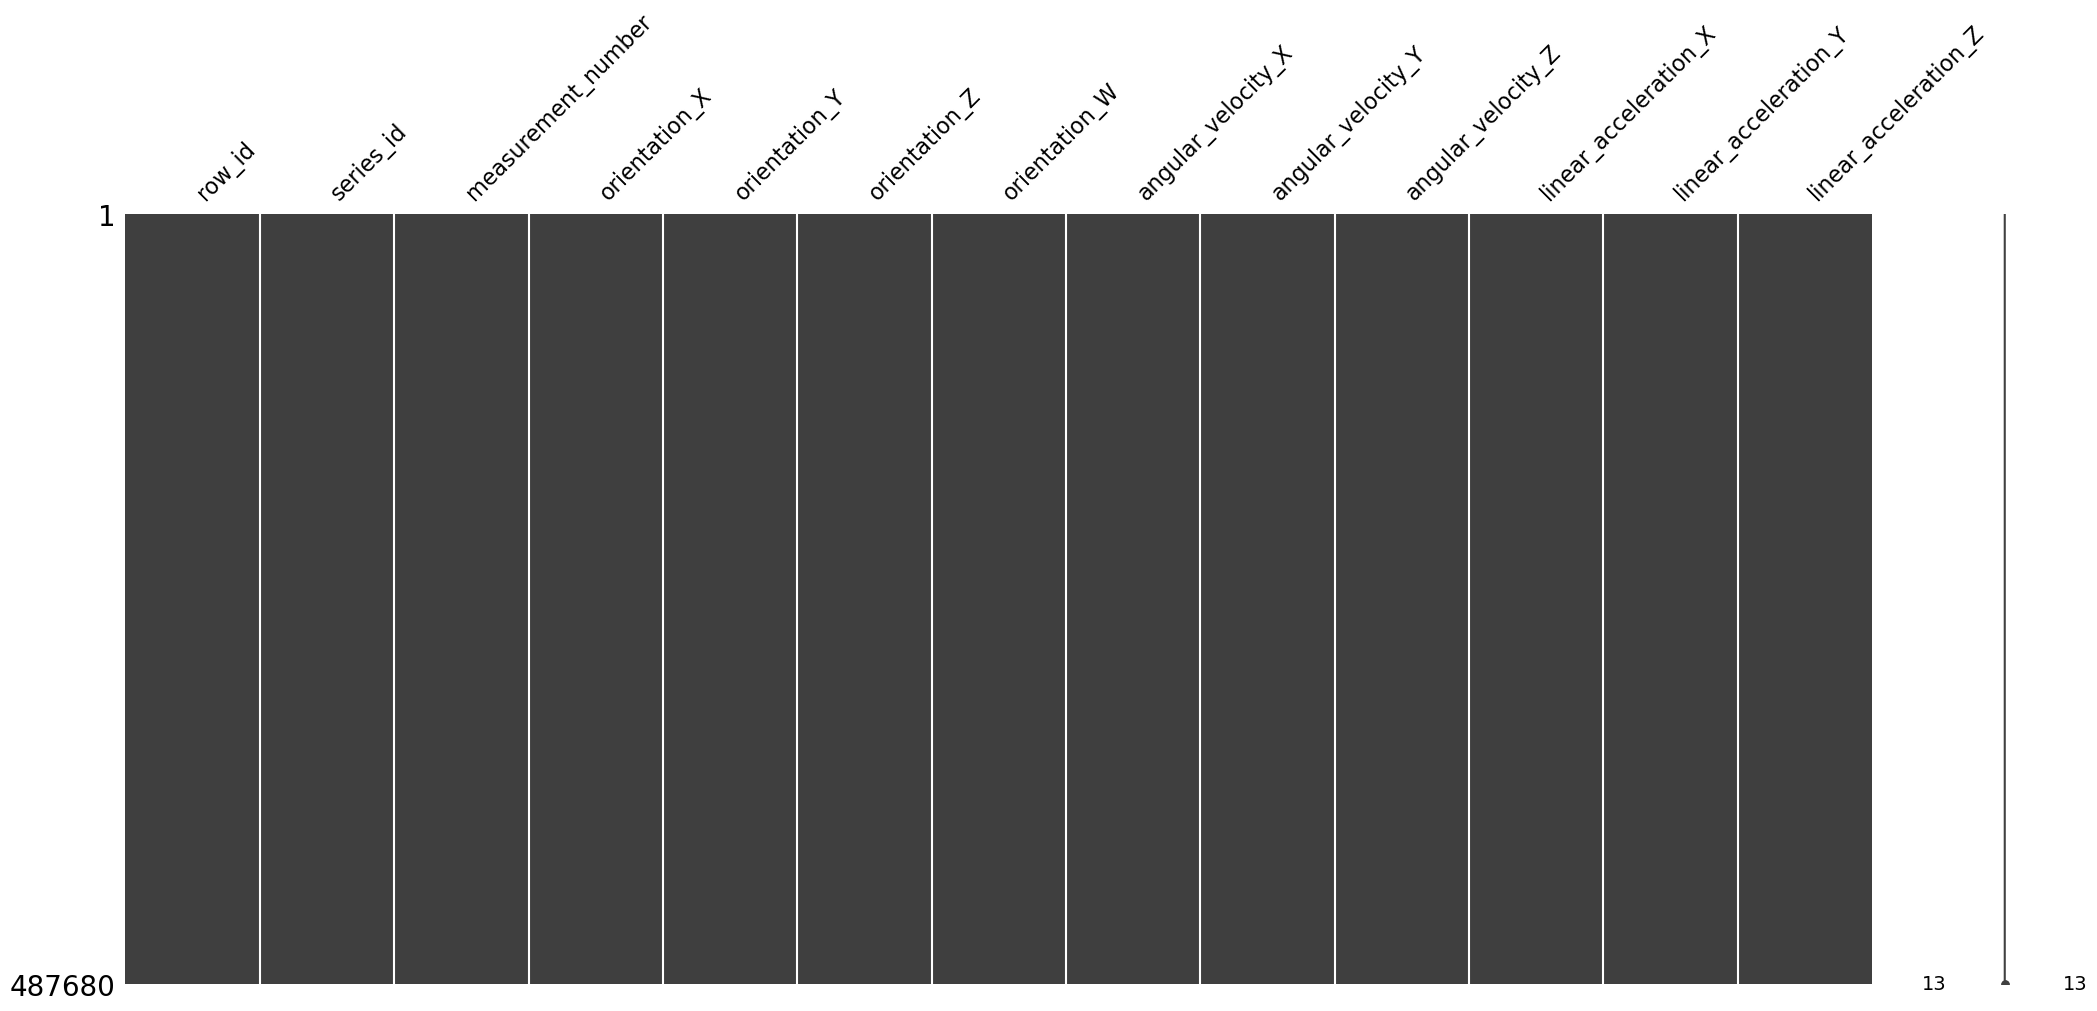

In [12]:
msno.matrix(X_train)

<AxesSubplot:>

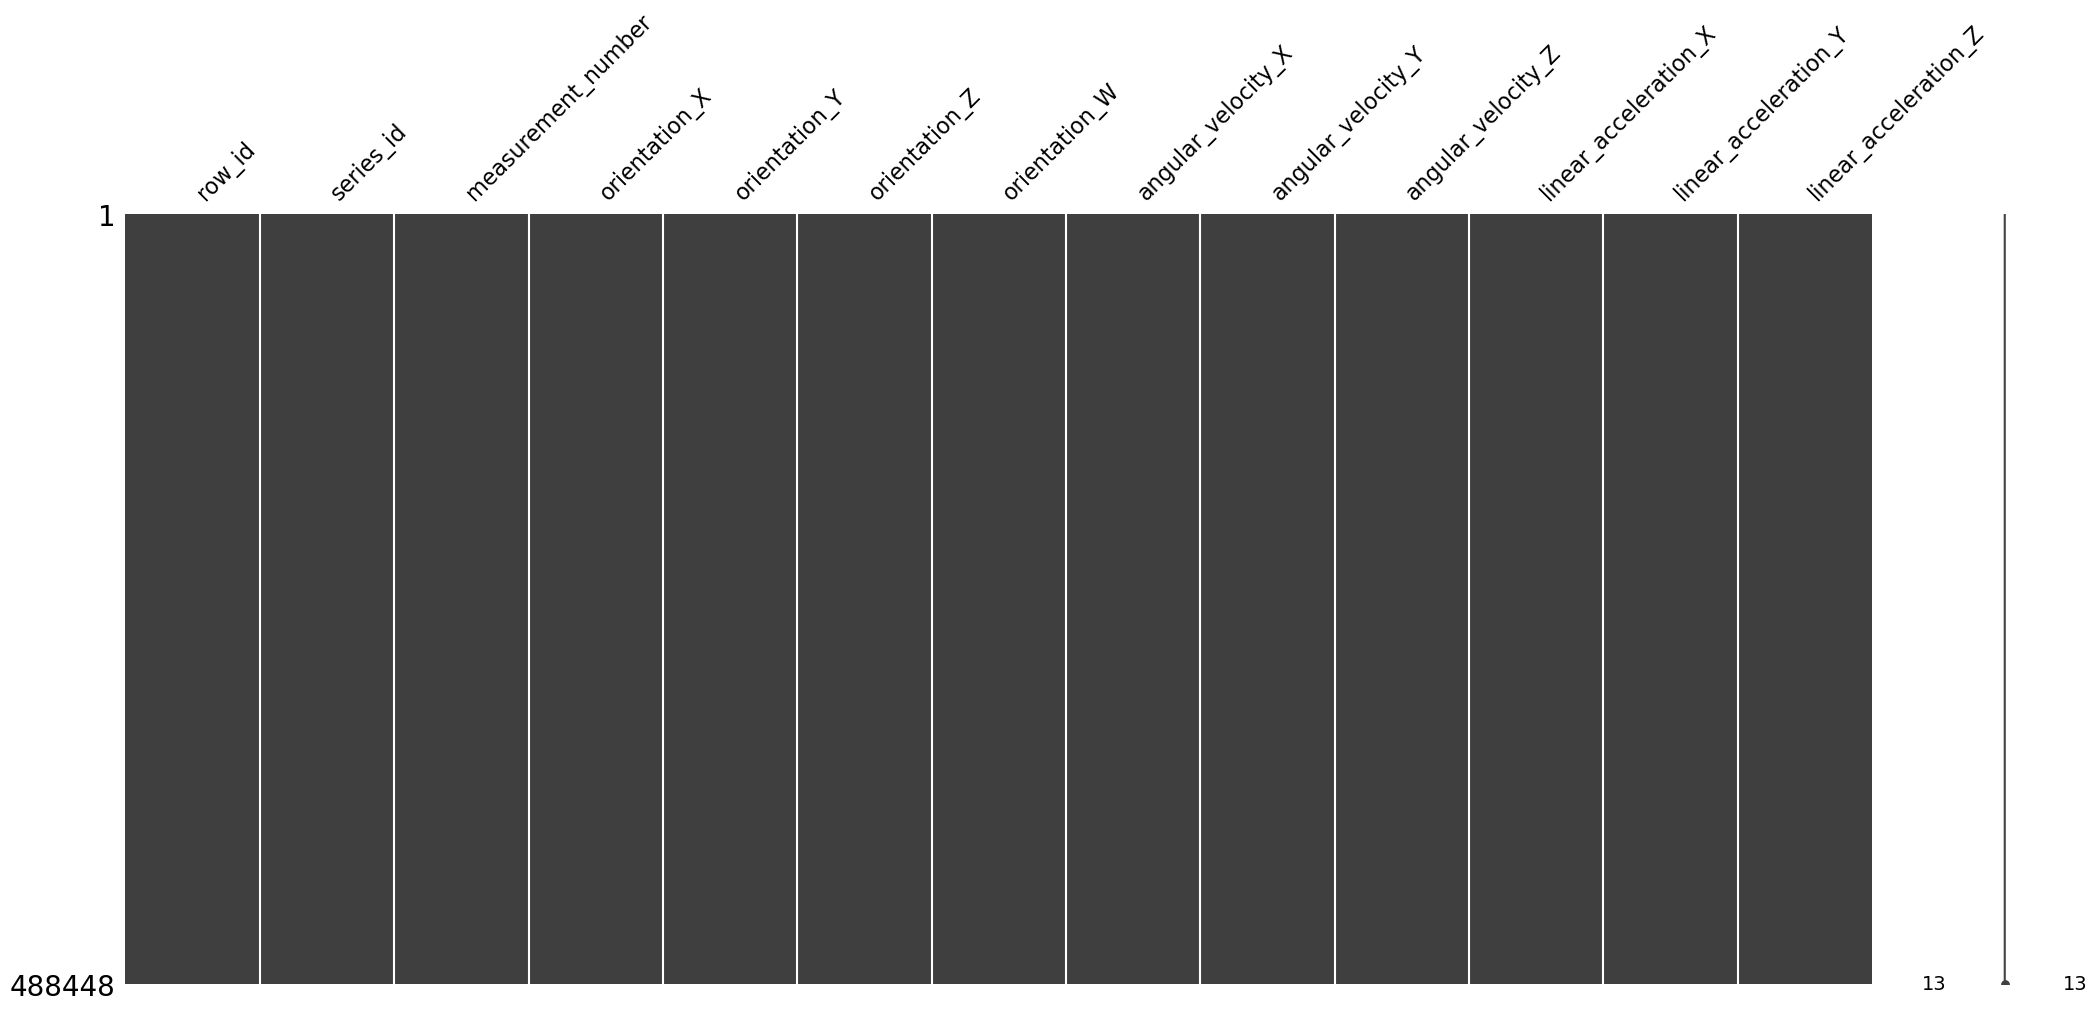

In [13]:
msno.matrix(X_test)

In [14]:
X_train = X_train.join(y_train.set_index('series_id'), on='series_id')
X_train = X_train.drop(['row_id', 'measurement_number', 'group_id'], axis=1)
X_test = X_test.drop(['row_id', 'measurement_number'], axis=1)

In [15]:
surfaces = list(y_train['surface'].unique())
surfaces

['fine_concrete',
 'concrete',
 'soft_tiles',
 'tiled',
 'soft_pvc',
 'hard_tiles_large_space',
 'carpet',
 'hard_tiles',
 'wood']

<AxesSubplot:xlabel='surface', ylabel='count'>

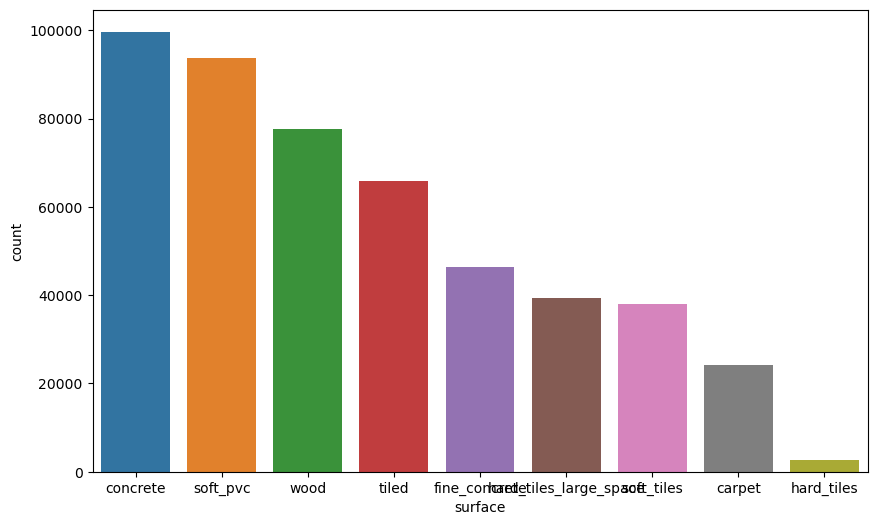

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='surface', data=X_train, order = X_train['surface'].value_counts().index)

In [16]:
X_train.columns

Index(['series_id', 'orientation_X', 'orientation_Y', 'orientation_Z',
       'orientation_W', 'angular_velocity_X', 'angular_velocity_Y',
       'angular_velocity_Z', 'linear_acceleration_X', 'linear_acceleration_Y',
       'linear_acceleration_Z', 'surface'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

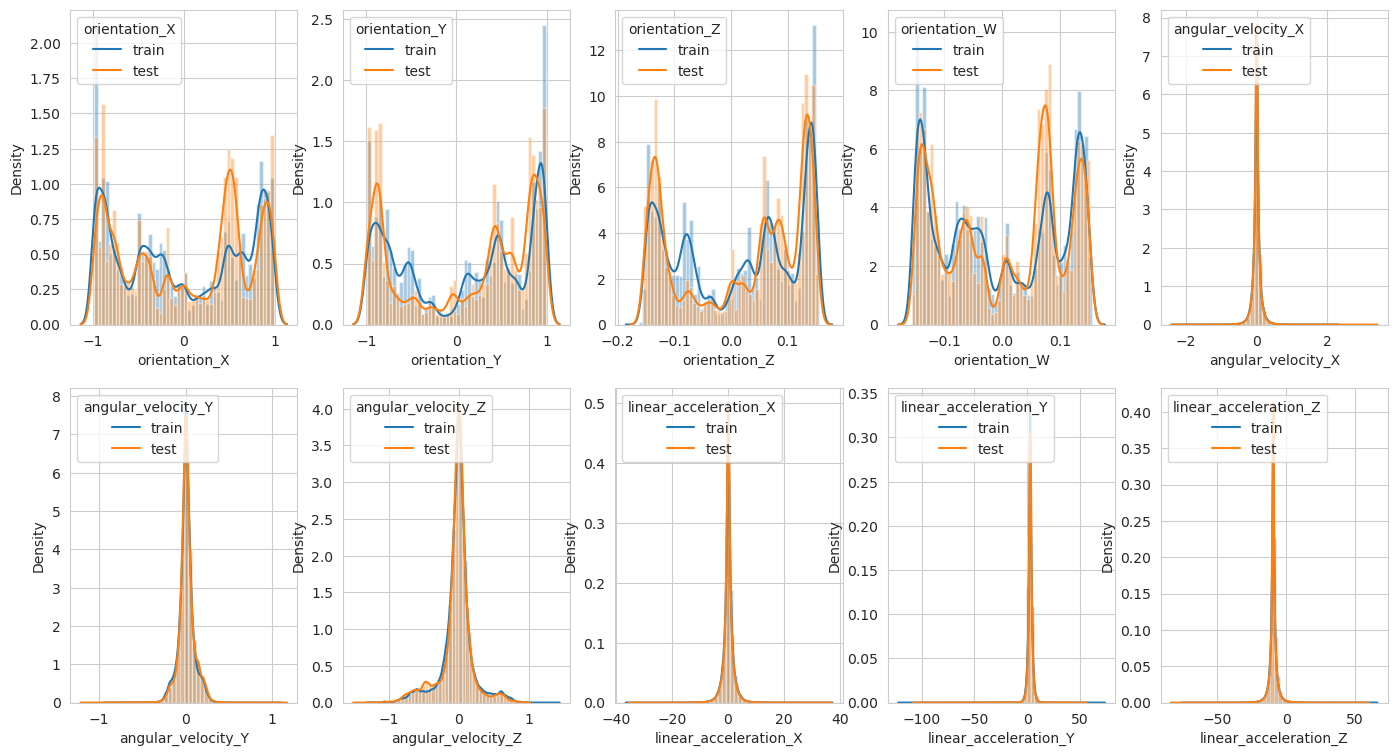

In [18]:
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2, 5, figsize=(17,9))
for column in X_train.columns[1:-1]:
    i += 1
    plt.subplot(2, 5, i)
    sns.distplot(X_train[column])
    sns.distplot(X_test[column])
    plt.legend(title=column, loc='upper left', labels=['train', 'test'])
plt.show()

<Figure size 640x480 with 0 Axes>

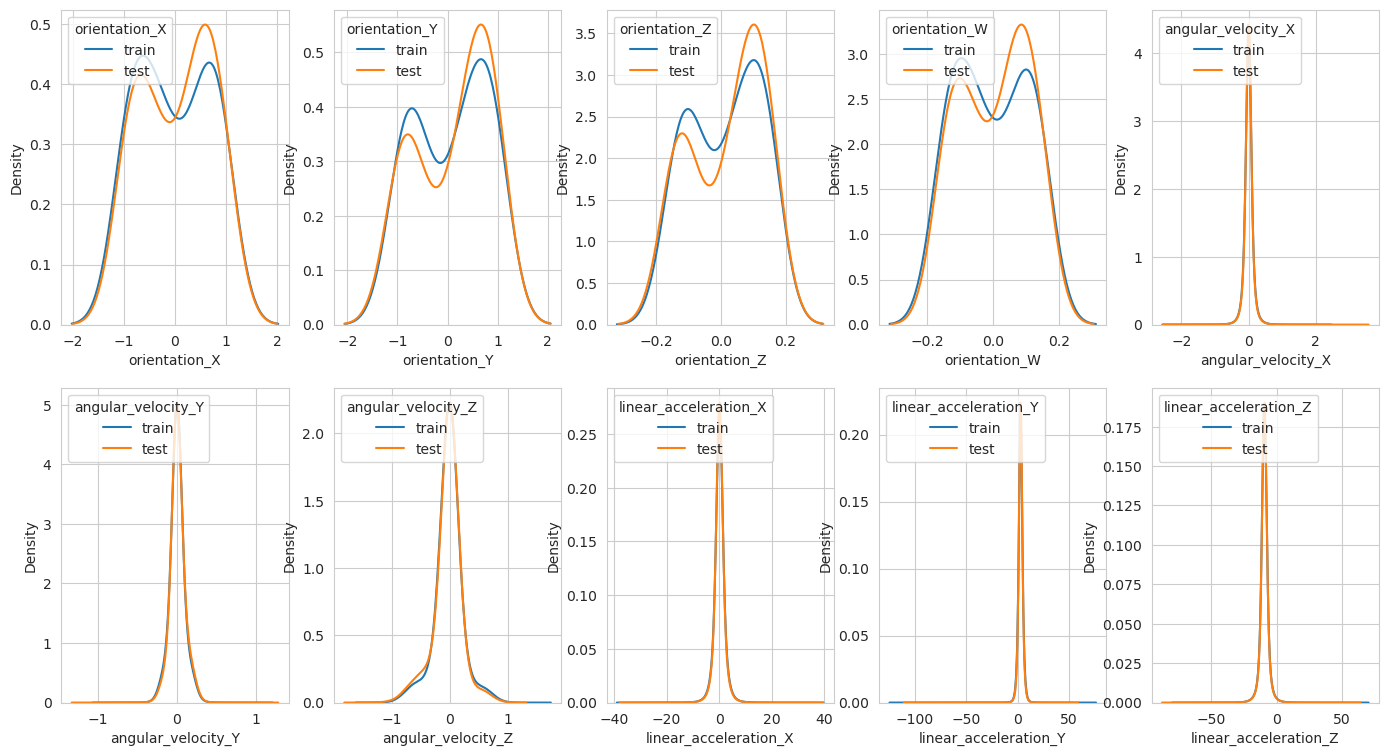

In [19]:
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2, 5, figsize=(17,9))
for column in X_train.columns[1:-1]:
    i += 1
    plt.subplot(2, 5, i)
    sns.kdeplot(X_train[column], bw=0.5)
    sns.kdeplot(X_test[column], bw=0.5)
    plt.legend(title=column, loc='upper left', labels=['train', 'test'])
plt.show()

<Figure size 640x480 with 0 Axes>

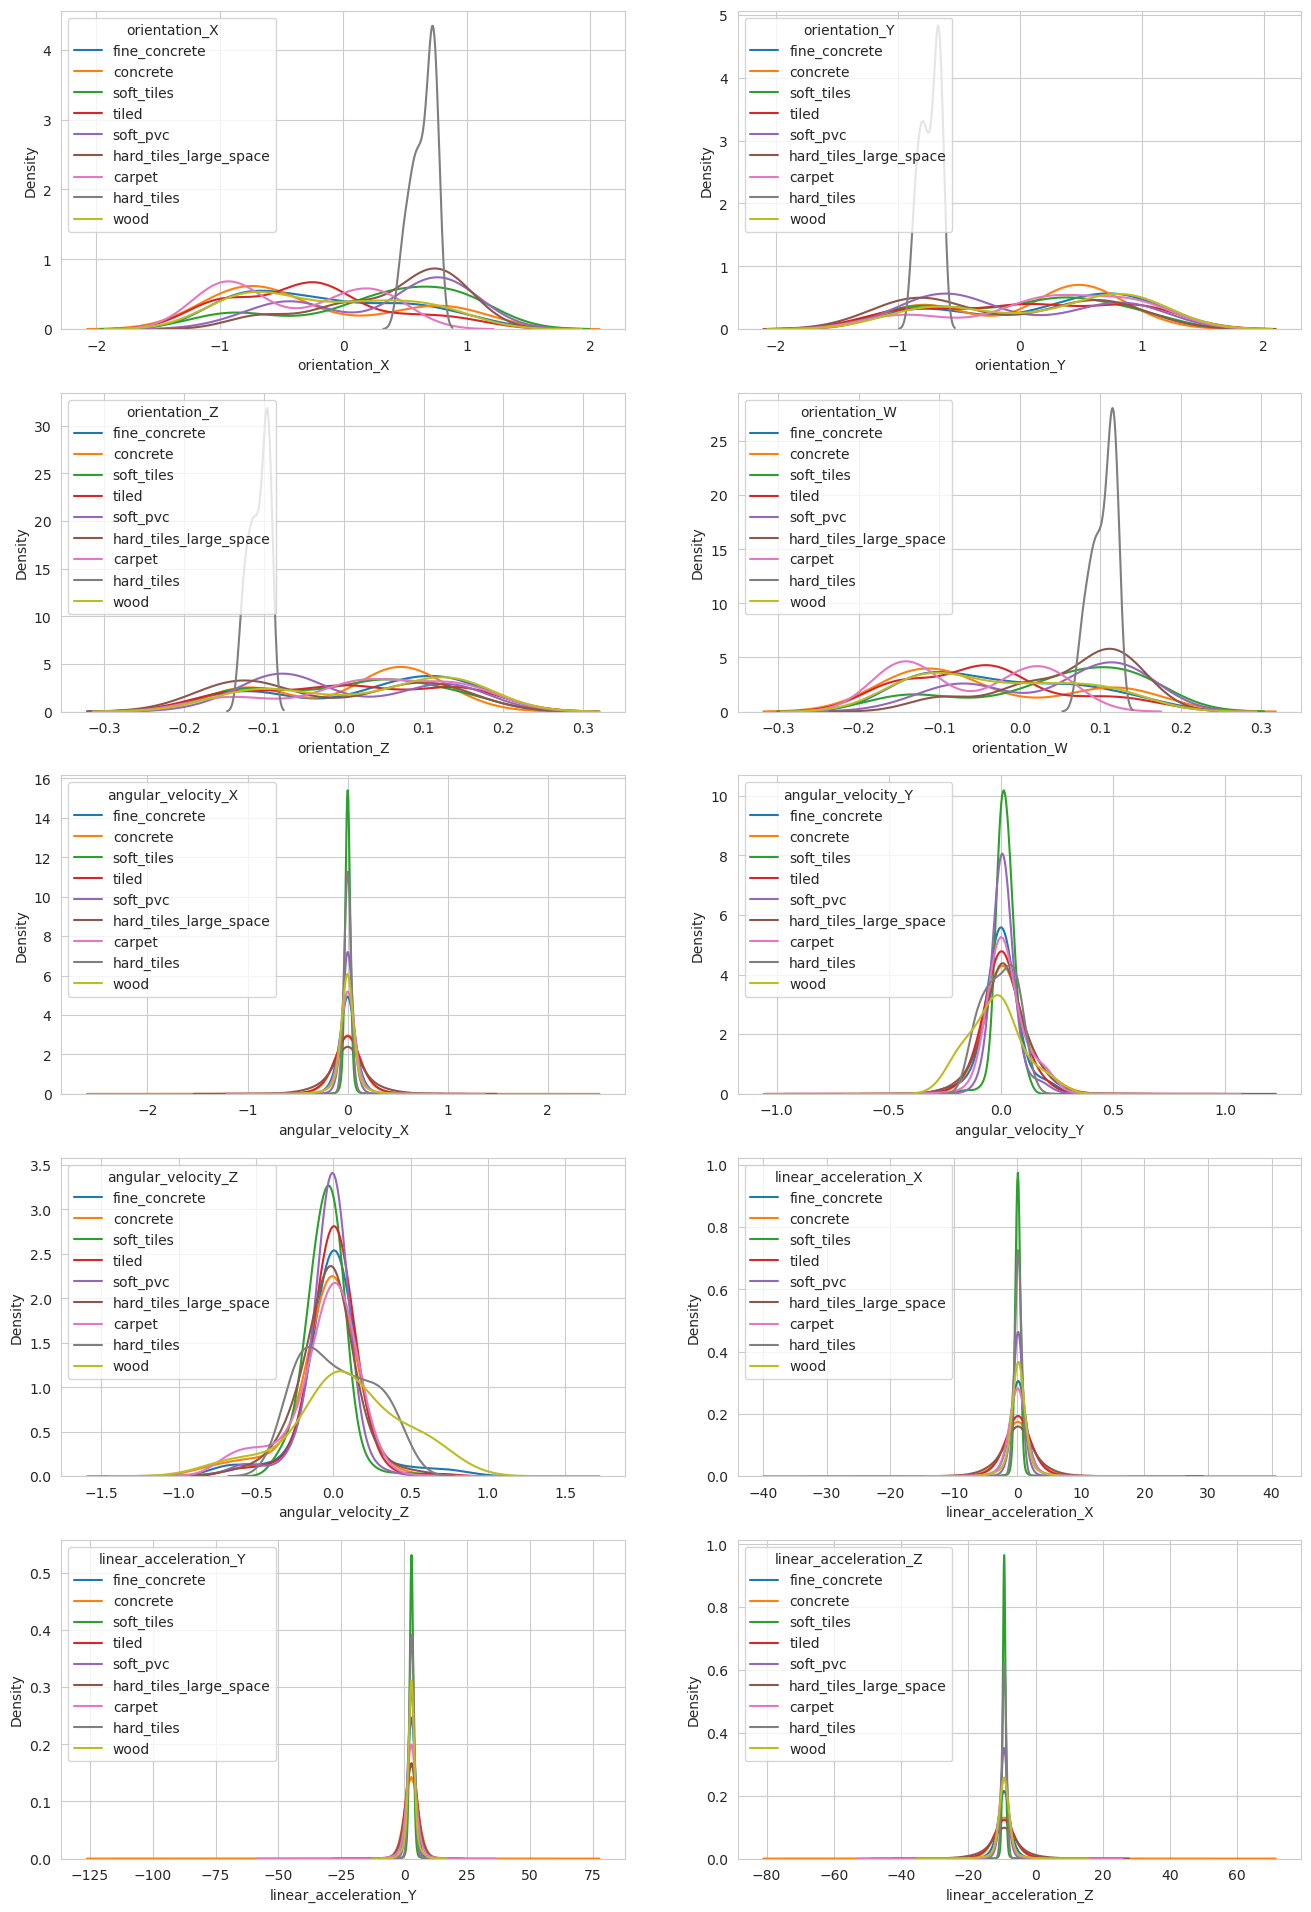

In [20]:
def plotDistributionPerSurface(data, num_rows, num_columns, size=(16,24)):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(num_rows, num_columns, figsize=size)
    for column in data.columns:
        if column == 'surface':
            continue
        i += 1
        plt.subplot(num_rows, num_columns, i)
        for surface in surfaces:
            sns.kdeplot(data[data['surface'] == surface][column], bw=0.5)
        plt.legend(title=column, loc='upper left', labels=surfaces)
    plt.show()

plotDistributionPerSurface(X_train[X_train.columns[1:]], 5, 2)

<AxesSubplot:>

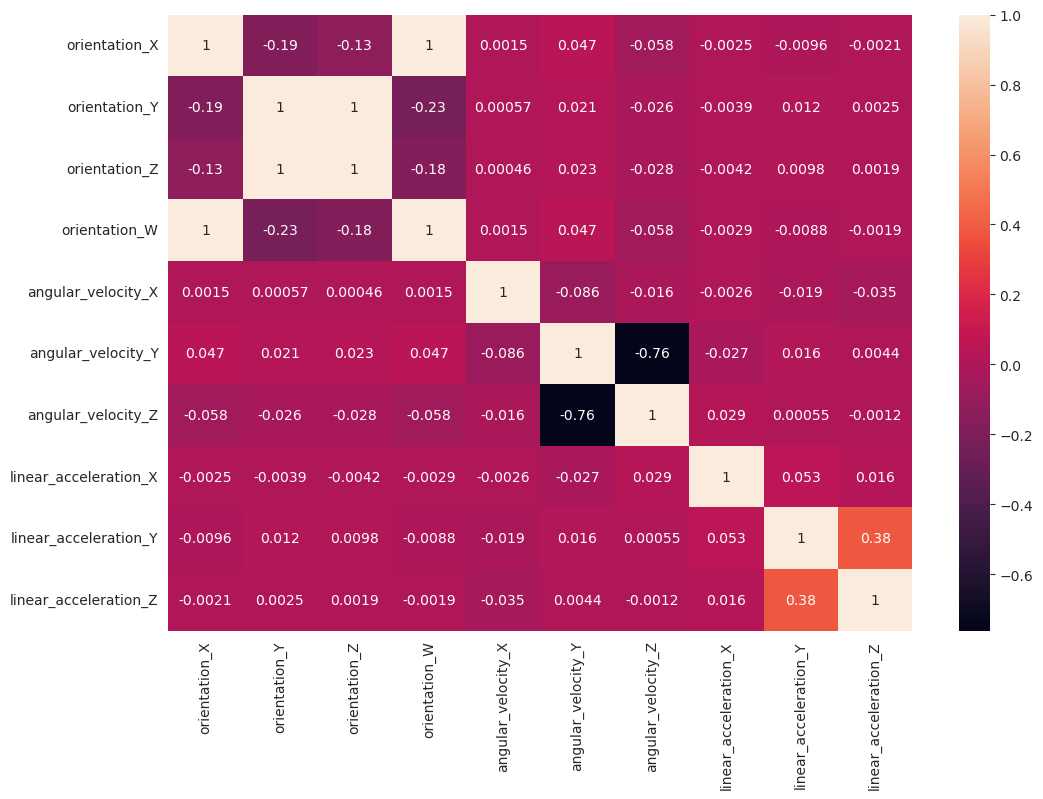

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(X_train[X_train.columns[1:-1]].corr(), annot=True)

In [22]:
# https://stackoverflow.com/questions/53033620/how-to-convert-euler-angles-to-quaternions-and-get-the-same-euler-angles-back-fr?rq=1
def quaternion_to_euler(x, y, z, w):
    import math
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = math.atan2(t3, t4)

    return X, Y, Z

In [23]:
def fe_step0 (actual):
    
    # https://www.mathworks.com/help/aeroblks/quaternionnorm.html
    # https://www.mathworks.com/help/aeroblks/quaternionmodulus.html
    # https://www.mathworks.com/help/aeroblks/quaternionnormalize.html
        
    actual['norm_quat'] = (actual['orientation_X']**2 + actual['orientation_Y']**2 + actual['orientation_Z']**2 + actual['orientation_W']**2)
    actual['mod_quat'] = (actual['norm_quat'])**0.5
    actual['norm_X'] = actual['orientation_X'] / actual['mod_quat']
    actual['norm_Y'] = actual['orientation_Y'] / actual['mod_quat']
    actual['norm_Z'] = actual['orientation_Z'] / actual['mod_quat']
    actual['norm_W'] = actual['orientation_W'] / actual['mod_quat']
    
    return actual

In [24]:
def fe_step1 (actual):
    """Quaternions to Euler Angles"""
    
    x, y, z, w = actual['norm_X'].tolist(), actual['norm_Y'].tolist(), actual['norm_Z'].tolist(), actual['norm_W'].tolist()
    nx, ny, nz = [], [], []
    for i in range(len(x)):
        xx, yy, zz = quaternion_to_euler(x[i], y[i], z[i], w[i])
        nx.append(xx)
        ny.append(yy)
        nz.append(zz)
    
    actual['euler_x'] = nx
    actual['euler_y'] = ny
    actual['euler_z'] = nz
    return actual

In [25]:
#X_train = fe_step0(X_train)
#X_test = fe_step0(X_test)

In [26]:
#X_train = fe_step1(X_train)
#X_test = fe_step1(X_test)

In [27]:
#plotDistributionPerSurface(X_train, 11, 2, (16,80))

In [28]:
#remove_features = ['orientation_Z', 'orientation_W', 'angular_velocity_Y', 'angular_velocity_X', 'angular_velocity_Z']
#remove_features = ['orientation_Z', 'orientation_W', 'norm_quat',
#                   'mod_quat', 'norm_Z', 'norm_W', 'euler_x', 'euler_y']
# X_train = X_train.drop(remove_features, axis=1)
# X_test = X_test.drop(remove_features, axis=1)

In [29]:
def transformData(data, is_train=True):
    df = pd.DataFrame()
    data['totl_anglr_vel'] = (data['angular_velocity_X']**2 + data['angular_velocity_Y']**2 + data['angular_velocity_Z']**2)** 0.5
    data['totl_linr_acc'] = (data['linear_acceleration_X']**2 + data['linear_acceleration_Y']**2 + data['linear_acceleration_Z']**2)**0.5
    data['totl_xyz'] = (data['orientation_X']**2 + data['orientation_Y']**2 + data['orientation_Z']**2)**0.5
    data['acc_vs_vel'] = data['totl_linr_acc'] / data['totl_anglr_vel']
    #data['totl_norm_XY'] = (data['norm_X']**2 + data['norm_Y']**2)** 0.5
    # PCA
#     pca = PCA(n_components=1)
#     data['velocity_pca'] = pca.fit_transform(data[['angular_velocity_X', 'angular_velocity_Y', 'angular_velocity_Z']])
#     data['linear_acceleration_pca'] = pca.fit_transform(data[['linear_acceleration_X', 'linear_acceleration_Y', 'linear_acceleration_Z']])
#     data['norm_pca'] = pca.fit_transform(data[['norm_X', 'norm_Y']])
#     data['norm_euler_pca'] = pca.fit_transform(data[['norm_X', 'norm_Y', 'euler_z']])
#     data['orientation_XY_pca'] = pca.fit_transform(data[['orientation_X', 'orientation_Y']])
    
    def mean_change_of_abs_change(x):
        return np.mean(np.diff(np.abs(np.diff(x))))
    
    for column in data.columns:
        if column in ['row_id','series_id','measurement_number', 'surface']:
            continue
        df[column + '_mean'] = data.groupby(['series_id'])[column].mean()
        df[column + '_median'] = data.groupby(['series_id'])[column].median()
        df[column + '_std'] = data.groupby(['series_id'])[column].std()
        df[column + '_min'] = data.groupby(['series_id'])[column].min()
        df[column + '_max'] = data.groupby(['series_id'])[column].max()
        #df[column + '_mad'] = data.groupby(['series_id'])[column].mad()
        #df[column + '_kurt'] = data.groupby(['series_id'])[column].apply(pd.DataFrame.kurt)
        #df[column + '_skew'] = data.groupby(['series_id'])[column].skew()
        #df[column + '_ma_10_mean'] = data.groupby(['series_id'])[column].rolling(window=10).mean().mean(skipna=True)
        #df[column + '_ma_16_mean'] = data.groupby(['series_id'])[column].rolling(window=16).mean().mean(skipna=True)
        #df[column + '_ma_10_std'] = data.groupby(['series_id'])[column].rolling(window=10).std().mean(skipna=True)
        #df[column + '_ma_16_std'] = data.groupby(['series_id'])[column].rolling(window=16).std().mean(skipna=True)
        #df[column + '_qtl25'] = data.groupby(['series_id'])[column].quantile(.25)
        #df[column + '_qtl50'] = data.groupby(['series_id'])[column].quantile(.50)
        #df[column + '_qtl75'] = data.groupby(['series_id'])[column].quantile(.75)
        #df[column + '_pct_change_1'] = data.groupby(['series_id'])[column].pct_change(periods=1)
        #df[column + '_pct_change_2'] = data.groupby(['series_id'])[column].pct_change(periods=2)
        #df[column + '_ma_5'] = talib.SMA(data.groupby(['series_id'])[column].values, timeperiod=5) / data.groupby(['series_id'])[column]  
        #df[column + '_RSI_5'] = talib.RSI(data.groupby(['series_id'])[column].values, timeperiod=n) / data.groupby(['series_id'])[column]
        #df[column + '_EWN_5'] = data.groupby(['series_id'])[column].ewm(span=5).mean()
        df[column + '_range'] = df[column + '_max'] - df[column + '_min']
        df[column + '_maxtoMin'] = df[column + '_max'] / df[column + '_min']
        df[column + '_mean_abs_chg'] = data.groupby(['series_id'])[column].apply(lambda x: np.mean(np.abs(np.diff(x))))
        #df[column + '_mean_change_of_abs_change'] = data.groupby('series_id')[column].apply(mean_change_of_abs_change)
        #df[column + '_mean_abs_chg_pct_1'] = df[column + '_mean_abs_chg'].pct_change(periods=1)
        #df[column + '_mean_abs_chg_pct_1'] = df[column + '_mean_change_of_abs_change'].pct_change(periods=1)
        df[column + '_abs_max'] = data.groupby(['series_id'])[column].apply(lambda x: np.max(np.abs(x)))
        df[column + '_abs_min'] = data.groupby(['series_id'])[column].apply(lambda x: np.min(np.abs(x)))
        df[column + '_abs_avg'] = (df[column + '_abs_min'] + df[column + '_abs_max'])/2
        # create a PCA that joins everything
        #df[column + '_pca'] = pca.fit_transform(df.filter(like=column, axis=1))
        if is_train:
            surface_groupby = data.groupby(['series_id']).surface.unique().apply(lambda x: x[0])
            df.loc[:,'surface'] = surface_groupby.values
    return df

def fe(data):
    
    df = pd.DataFrame()
    data['totl_anglr_vel'] = (data['angular_velocity_X']**2 + data['angular_velocity_Y']**2 +
                             data['angular_velocity_Z']**2)** 0.5
    data['totl_linr_acc'] = (data['linear_acceleration_X']**2 + data['linear_acceleration_Y']**2 +
                             data['linear_acceleration_Z'])**0.5
    data['totl_xyz'] = (data['orientation_X']**2 + data['orientation_Y']**2 +
                             data['orientation_Z'])**0.5
   
    data['acc_vs_vel'] = data['totl_linr_acc'] / data['totl_anglr_vel']
    
    for col in data.columns:
        if col in ['row_id','series_id','measurement_number', 'surface']:
            continue
        df[col + '_mean'] = data.groupby(['series_id'])[col].mean()
        df[col + '_median'] = data.groupby(['series_id'])[col].median()
        df[col + '_max'] = data.groupby(['series_id'])[col].max()
        df[col + '_min'] = data.groupby(['series_id'])[col].min()
        df[col + '_std'] = data.groupby(['series_id'])[col].std()
        df[col + '_range'] = df[col + '_max'] - df[col + '_min']
        df[col + '_maxtoMin'] = df[col + '_max'] / df[col + '_min']
        df[col + '_mean_abs_chg'] = data.groupby(['series_id'])[col].apply(lambda x: np.mean(np.abs(np.diff(x))))


        df[col + '_abs_max'] = data.groupby(['series_id'])[col].apply(lambda x: np.max(np.abs(x)))
        df[col + '_abs_min'] = data.groupby(['series_id'])[col].apply(lambda x: np.min(np.abs(x)))
        df[col + '_abs_avg'] = (df[col + '_abs_min'] + df[col + '_abs_max'])/2
    return df

In [30]:
train = fe(X_train)
test = fe(X_test)

In [31]:
train.fillna(0, inplace = True)
train.replace(-np.inf,0,inplace=True)
train.replace(np.inf,0,inplace=True)
test.fillna(0, inplace = True)
test.replace(-np.inf,0,inplace=True)
test.replace(np.inf,0,inplace=True)

<AxesSubplot:>

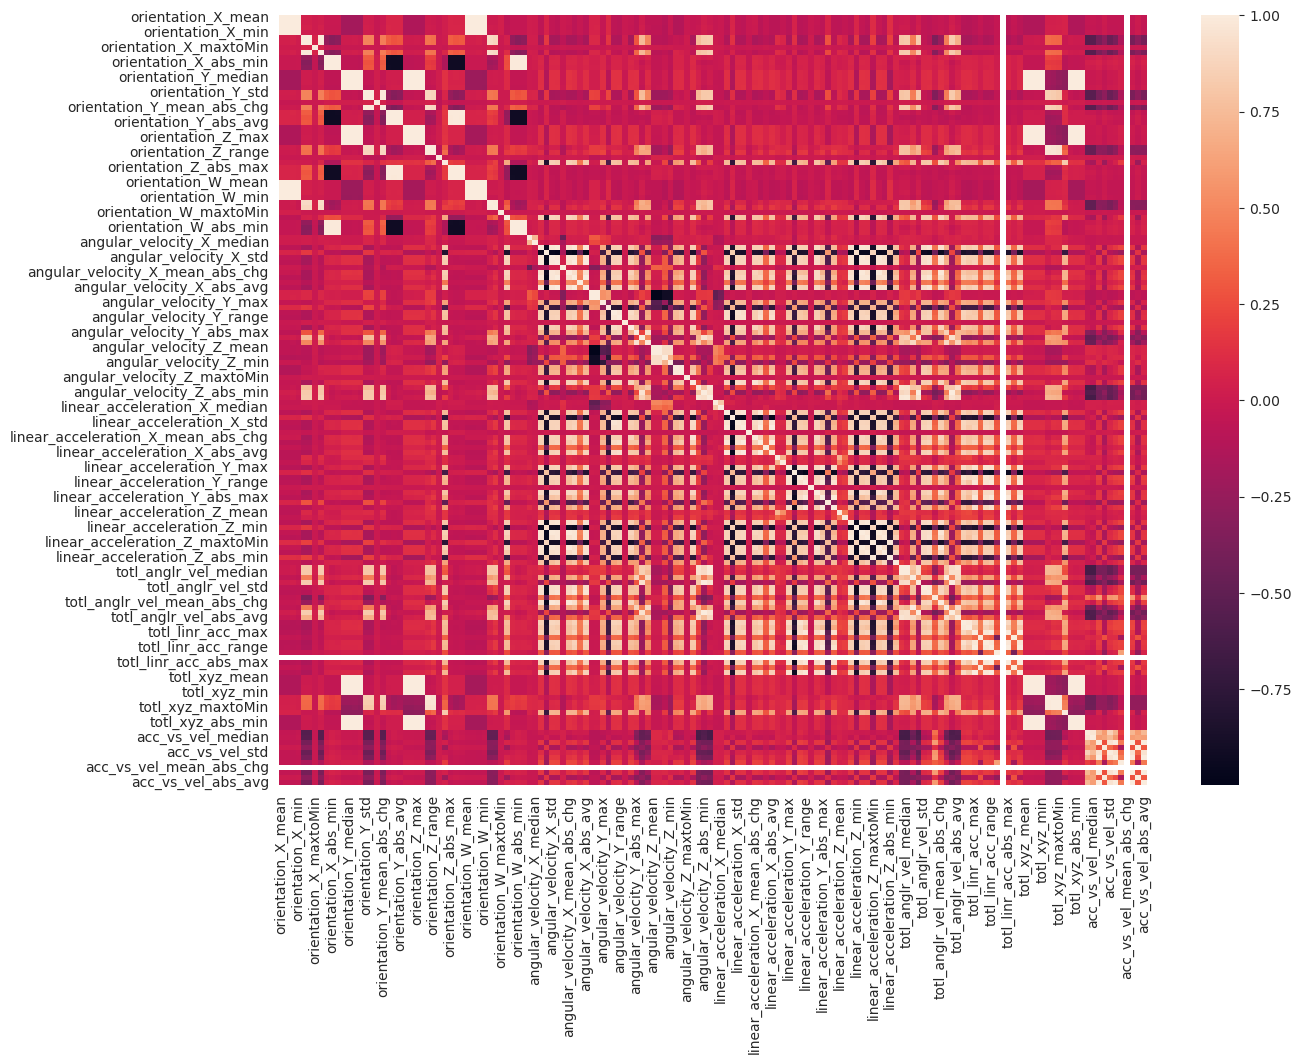

In [32]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(train.corr())

In [33]:
#plotDistributionPerSurface(train, 113, 2, (16,260))

In [34]:
# most_important_features = ['orientation_X_max',
#  'norm_X_max',
#  'orientation_X_median',
#  'norm_X_min',
#  'orientation_X_mean',
#  'norm_X_median',
#  'norm_X_mean',
#  'orientation_X_min',
#  'linear_acceleration_Y_mean_abs_chg',
#  'euler_z_max',
#  'euler_z_mean',
#  'euler_z_min',
#  'euler_z_median',
#  'linear_acceleration_Z_mean_abs_chg',
#  'norm_Y_min',
#  'totl_linr_acc_mean_abs_chg',
#  'norm_Y_mean',
#  'orientation_Y_min']

# pca = PCA(n_components=1)
# pca.fit(train[most_important_features])
# print(pca.explained_variance_ratio_) 


In [35]:
# train['pca_best_1'] = pca.fit_transform(train[most_important_features])
# pca_best_features = pd.DataFrame(pca.fit_transform(train[most_important_features]),
#                                  columns=['pca_best_1', 'pca_best_2', 'pca_best_3'])
# train = train.join(pca_best_features)

In [36]:
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

In [37]:
def plotFeatureImportancesRF(forest, X):
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [38]:
# scaler = StandardScaler()

In [39]:
le = LabelEncoder()
y = le.fit_transform(y_train['surface'])
X_train = train

In [40]:


# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y, test_size=0.30, random_state=42)

In [41]:
def k_folds(X, y, X_test, k):
    folds = StratifiedKFold(n_splits = k, shuffle=True, random_state=2019)
    y_test = np.zeros((X_test.shape[0], 9))
    y_oof = np.zeros((X.shape[0]))
    score = 0
    for i, (train_idx, val_idx) in  enumerate(folds.split(X, y)):
        clf =  RandomForestClassifier(n_estimators = 500, n_jobs = -1)
        clf.fit(X.iloc[train_idx], y[train_idx])
        y_oof[val_idx] = clf.predict(X.iloc[val_idx])
        y_test += clf.predict_proba(X_test) / folds.n_splits
        score += clf.score(X.iloc[val_idx], y[val_idx])
        print('Fold: {} score: {}'.format(i,clf.score(X.iloc[val_idx], y[val_idx])))
    print('Avg Accuracy', score / folds.n_splits) 
        
    return y_oof, y_test 

In [42]:
y_oof, y_test = k_folds(X_train, y, test, k= 50)

Fold: 0 score: 0.935064935064935
Fold: 1 score: 0.8961038961038961
Fold: 2 score: 0.922077922077922
Fold: 3 score: 0.961038961038961
Fold: 4 score: 0.8701298701298701
Fold: 5 score: 0.8701298701298701
Fold: 6 score: 0.8441558441558441
Fold: 7 score: 0.922077922077922
Fold: 8 score: 0.948051948051948
Fold: 9 score: 0.922077922077922
Fold: 10 score: 0.8157894736842105
Fold: 11 score: 0.9078947368421053
Fold: 12 score: 0.8947368421052632
Fold: 13 score: 0.9210526315789473
Fold: 14 score: 0.8947368421052632
Fold: 15 score: 0.9342105263157895
Fold: 16 score: 0.8289473684210527
Fold: 17 score: 0.9210526315789473
Fold: 18 score: 0.8552631578947368
Fold: 19 score: 0.868421052631579
Fold: 20 score: 0.9078947368421053
Fold: 21 score: 0.9342105263157895
Fold: 22 score: 0.9078947368421053
Fold: 23 score: 0.8947368421052632
Fold: 24 score: 0.9210526315789473
Fold: 25 score: 0.9078947368421053
Fold: 26 score: 0.8947368421052632
Fold: 27 score: 0.9342105263157895
Fold: 28 score: 0.881578947368421
Fol

In [43]:
confusion_matrix(y_oof,y)

array([[155,   3,   0,   0,   2,   3,   2,   3,   0],
       [ 14, 696,  19,   1,  11,  18,   4,  23,  16],
       [  0,   9, 294,   0,   2,   5,   0,   3,   5],
       [  0,   0,   0,  10,   0,   0,   0,   0,   1],
       [  1,  13,   2,   0, 284,   4,   0,   3,   1],
       [  4,  16,   7,   0,   2, 679,   4,   8,  23],
       [  3,   9,   2,   2,   0,   7, 281,   4,   3],
       [  2,   9,  12,   0,   0,   3,   0, 460,  21],
       [ 10,  24,  27,   8,   7,  13,   6,  10, 537]])

In [44]:
# rfc = RandomForestClassifier(
#     bootstrap=False,
#     max_depth=50,
#     max_features='auto',
#     min_samples_leaf=1,
#     min_samples_split=2,
#     random_state=42,
#     n_estimators=800,
#     n_jobs = -1)

# cv = StratifiedKFold(n_splits=3, shuffle=False, random_state=42)

# scores = cross_val_score(rfc, X_train, y, cv=cv, scoring='accuracy')
# print("Auc: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [45]:


# rfc = rfc.fit(X_train, y)
# feature_importances = pd.DataFrame(rfc.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)



In [46]:


# feature_importances



In [47]:


#f1_score(y_validation, y_pred, average='macro') 



In [48]:


# features = X_train.columns
# importances = rfc.feature_importances_
# indices = np.argsort(importances)

# fig, ax = plt.subplots(figsize=(10, 85))
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()



In [49]:
#cm_analysis(y_validation, y_pred, rfc.classes_, ymap=None, figsize=(20,20))

In [50]:
# y_train = train['surface']
# X_train = train.drop(['surface'], axis=1)

In [51]:
y_test = np.argmax(y_test, axis=1)

submission = pd.DataFrame(
    {'surface': le.inverse_transform(y_test)},
    index=test.index
)

submission.to_csv('submission.csv', index=True)

submission.head(10)

,surface
series_id,
0,soft_pvc
1,wood
2,concrete
3,wood
4,concrete
5,wood
6,soft_pvc
7,concrete
8,soft_tiles


In [52]:
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [53]:


# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)



In [54]:


#rf_random.best_params_



In [55]:
# best_random = rf_random.best_estimator_

In [56]:
# Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [False],
#     'max_depth': [35, 40, 50, 80, 120],
#     'max_features': ['auto'],
#     'min_samples_leaf': [1, 3, 5, 8],
#     'min_samples_split': [2, 5, 8, 12],
#     'n_estimators': [800, 1000, 2000, 3000]
# }
# Create a based model
# rf = RandomForestClassifier()
# Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [57]:
# Fit the grid search to the data
#grid_search.fit(X_train, y_train)
#grid_search.best_params_
#best_grid = grid_search.best_estimator_
# grid_accuracy = evaluate(best_grid, test_features, test_labels)
# print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [58]:
#grid_search.best_params_

In [59]:


# et = ExtraTreesClassifier(
#     bootstrap=False,
#     max_depth=50,
#     max_features='auto',
#     min_samples_leaf=1,
#     min_samples_split=2,
#     random_state=42,
#     n_estimators=800,
#     n_jobs = -1).fit(X_train, y_train)
# y_pred = et.predict(test)



In [60]:
# pd.DataFrame({'surface': y_pred}, index=test.index).to_csv('submission.csv', index=True)